# Text analysis

In this notebook we analyse the usage of the text component in data stories.

In [2]:
import json
import matplotlib.pyplot as plt

from collections import defaultdict, Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors

color_palette = ['#5565cf', '#b14ecf', '#cf4773', '#cf913f', '#87cf38', '#30cf6b', '#29a1cf', '#2138cf']

file_path = 'data_stories_summary.json'
with open(file_path, 'r') as file:
    data = json.load(file)

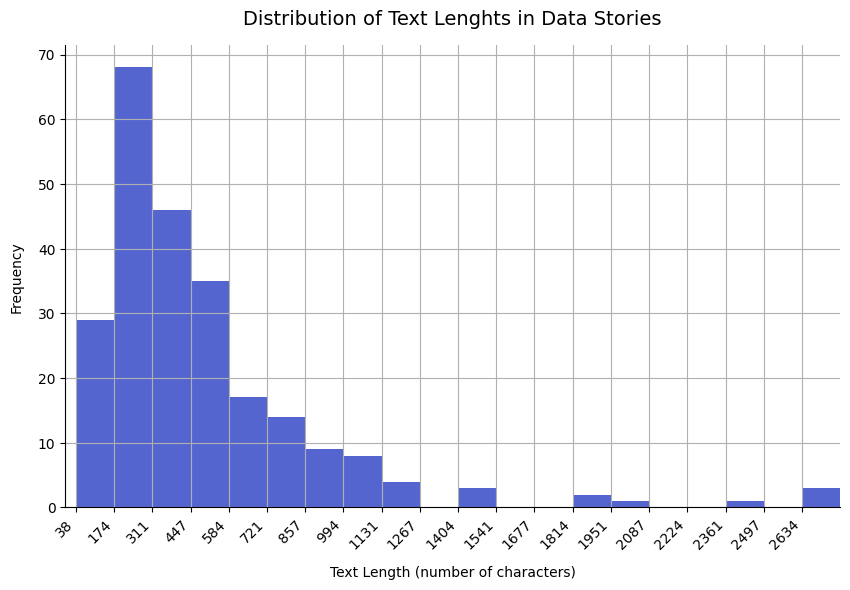

In [ ]:
# Extracting text elements and calculating their lengths

text_lengths = []

for story_id, story_data in data.items():
    texts = story_data.get('texts', [])
    for text in texts:
        if len(text) > 0:
            text_lengths.append(len(text))

min_length = min(text_lengths)
max_length = max(text_lengths)

num_bins = 20

bin_edges = np.linspace(min_length, max_length, num_bins + 1)

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    text_lengths, 
    bins=num_bins, 
    range=(min_length, max_length), 
    color=color_palette[0]
)

bin_labels = [f'{int(bins[i])}' for i in range(len(bins)-1)]
plt.xticks(ticks=bins[:-1], labels=bin_labels, rotation=45, ha='right')
plt.xlim(0, bins[-1])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Distribution of Text Lenghts in Data Stories', fontsize=14, pad=15)
plt.xlabel('Text Length (number of characters)', labelpad=10)
plt.ylabel('Frequency', labelpad=10)
plt.grid(True)

# Save as JPG with 300 dpi
# plt.savefig("outputs/img/7.jpg", dpi=300, bbox_inches="tight", format="jpg")

# Save as EPS (vector format, resolution-independent)
# plt.savefig("outputs/img/7.eps", format="eps", bbox_inches="tight")

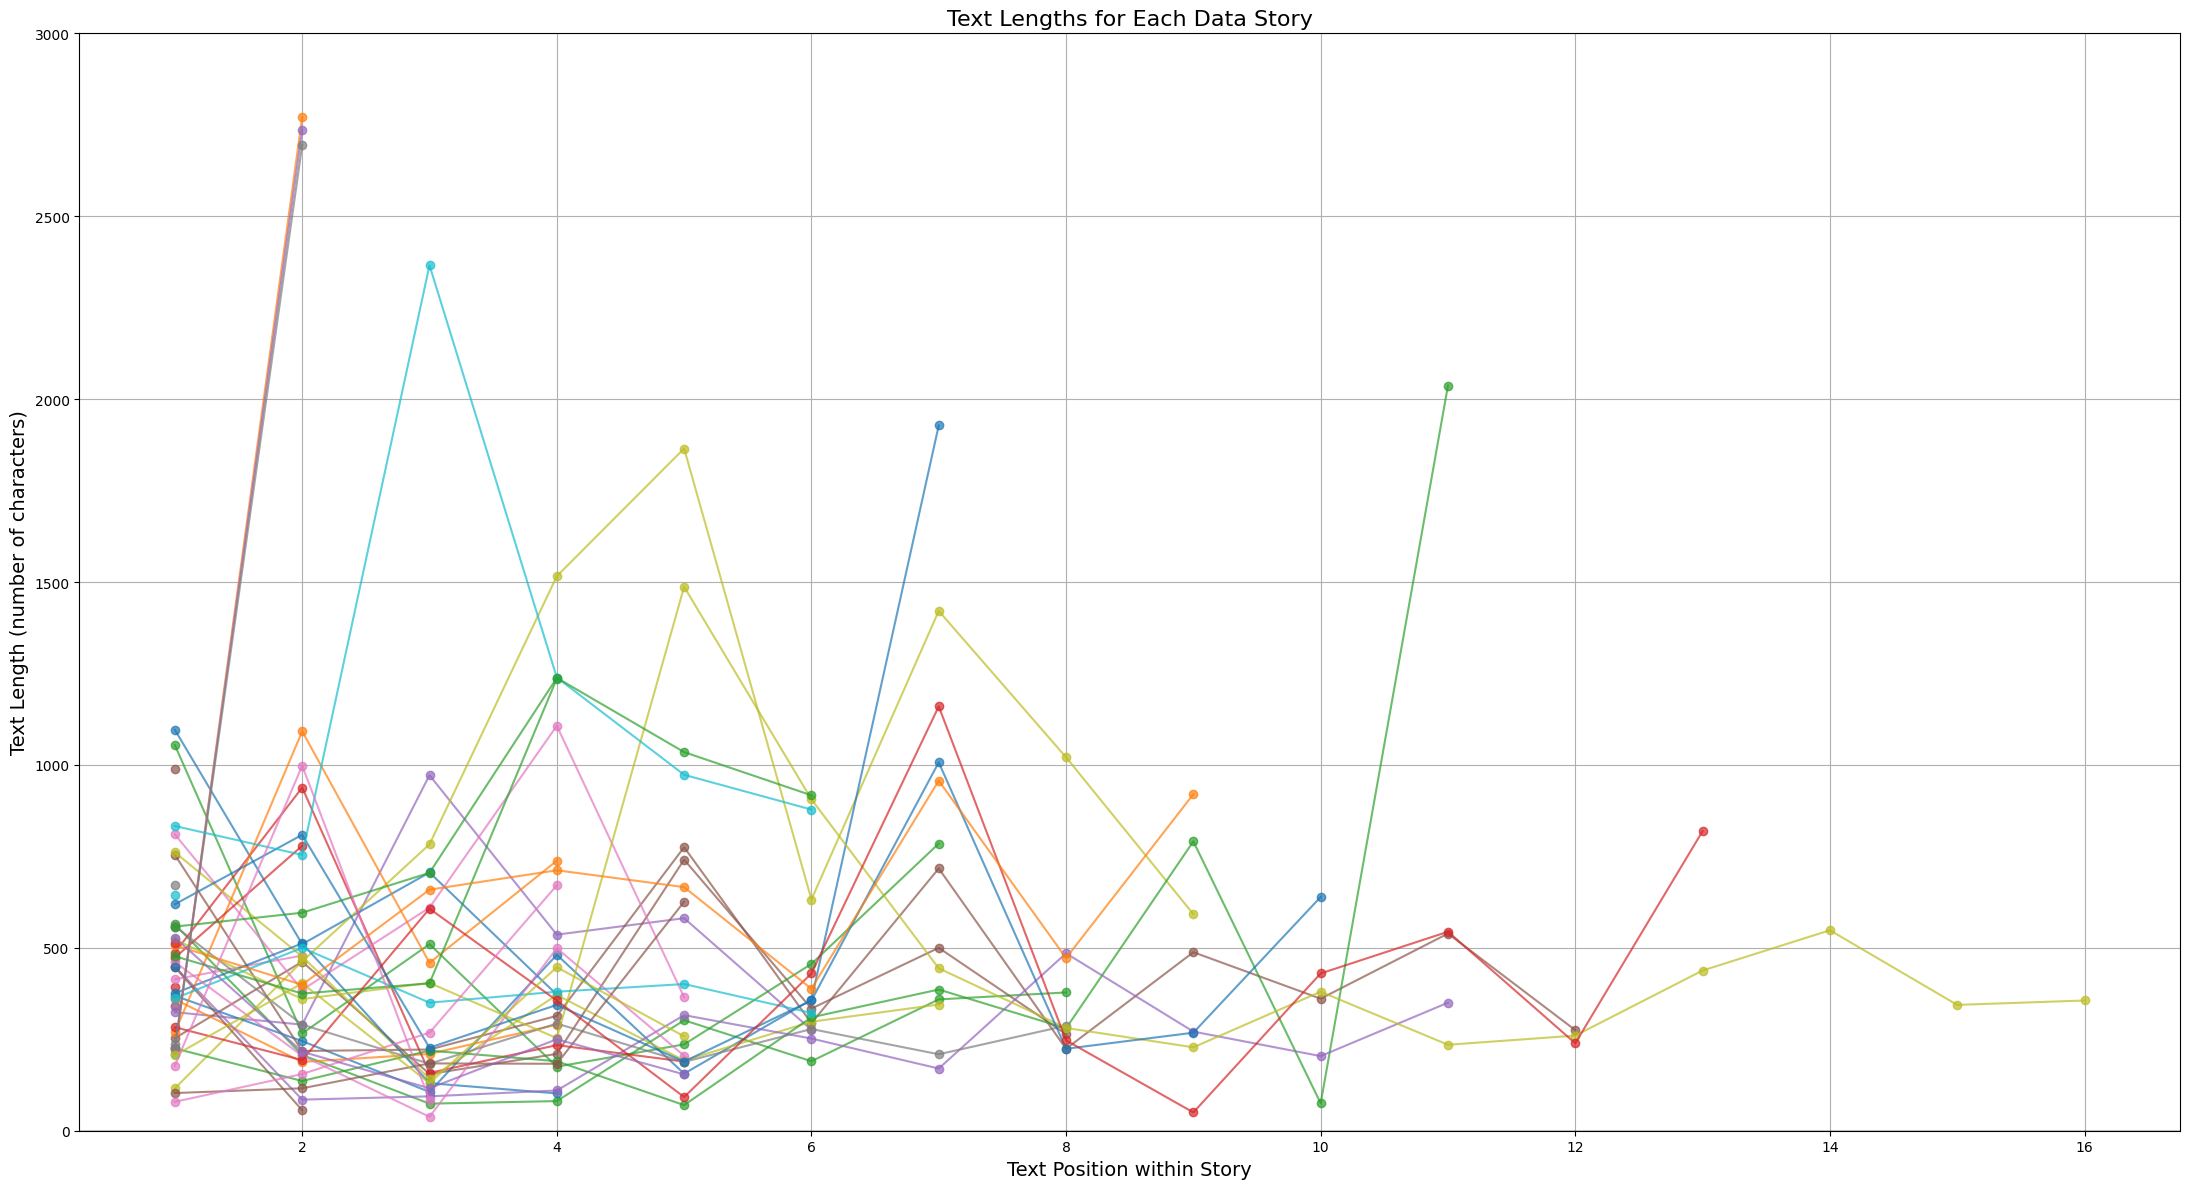

In [ ]:
# unreadable chart
text_lengths_per_story = {}

# Iterate over each story in the JSON data
for story_id, story_data in data.items():
    texts = story_data.get('texts', [])
    
    # Collect lengths for each text in the story
    text_lengths_per_story[story_id] = [len(text) for text in texts if len(text) > 0]

# Plot the line chart
plt.figure(figsize=(22, 12))

# Plot each story's text lengths as a separate line with alpha for transparency
for story_id, lengths in text_lengths_per_story.items():
    if len(lengths) > 0:
        plt.plot(range(1, len(lengths) + 1), lengths, marker='o', alpha=0.7)

# Customize the plot
plt.title('Text Lengths for Each Data Story', fontsize=16)
plt.xlabel('Text Position within Story', fontsize=14)
plt.ylabel('Text Length (number of characters)', fontsize=14)

# Set y-axis limit with a max value of 3000 for better separation
plt.ylim(0, 3000)

# Customize the grid and set axes
plt.grid(True)
plt.axhline(0, color='black', linewidth=1.0)  # X-axis at y=0

# Remove the legend
# plt.legend() is omitted to avoid showing the legend

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


{'D-hp3wDV': [1096, 510, 706, 372], 'y4Srva15': [340], '7qpfziir': [564, 207, 74, 81, 302, 190, 359, 378], 'Nokx0yU6': [392], 'gz_gxhYn': [324, 290, 972, 536, 581, 276], 'U2OtB3XT': [253, 462, 155, 210, 741, 334, 500, 264], 'v4h_GSI0': [414, 479], '1ptR3pru': [556], 'JQpdcw-d': [116, 463, 783, 1516, 1865, 632, 1421, 1021, 592], 'B9SLlUry': [645], 'r7i-PG2n': [369, 245, 106, 481, 156, 358, 1928], 'AUmcnOzL': [359, 188, 210, 290], 'tyK82z37': [1054, 266, 510, 175, 236, 456, 785], 'IRRbkmZk': [487, 938, 158, 234, 189], 'Vy4_Rxzv': [342], 'M9EZmoBI': [754, 218, 222, 314, 775, 294, 717, 224, 488, 361, 539, 275], 'uhDaBOl1': [810, 385, 610, 1107, 365], 'SXefpzf4': [], 'EzsIH_Et': [], '16FP4tfG': [671], 'sUMoEZI5': [761, 476, 142, 371, 192, 298, 345], '_HnVHPjm': [211], '4D206Lam': [376, 512, 130, 102], 'j3ZikN40': [269, 1092, 459, 738], 'BOGODrvZ': [225, 136, 219, 190, 70, 310, 386, 280, 791, 75, 2037], 'abkhtH-r': [473, 779], 'Huo1mZpJ': [449, 85, 94, 110, 316, 252, 170, 485, 271, 204, 350]

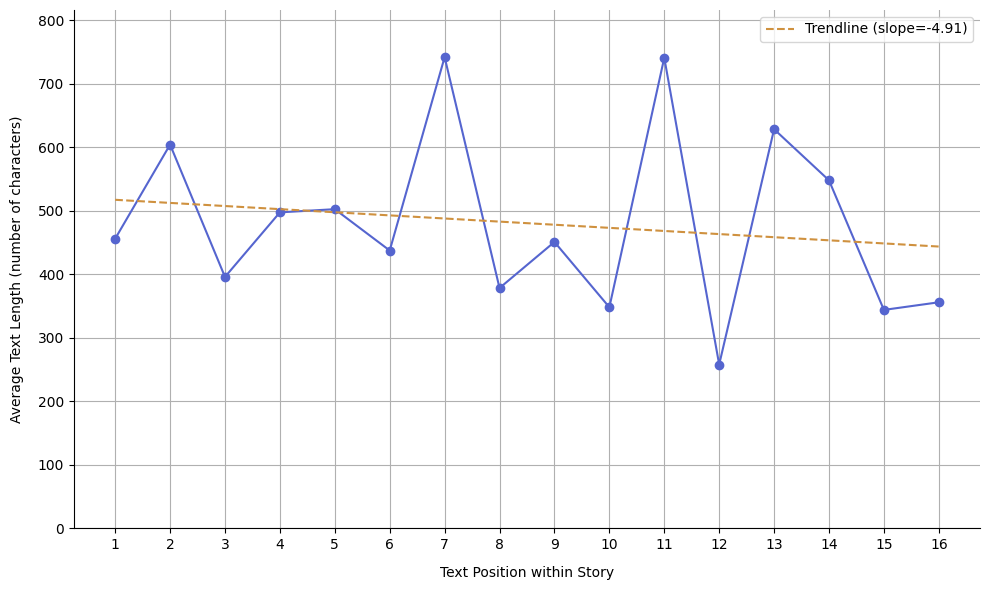

In [ ]:
text_lengths_per_story = {}

# Iterate over each story in the JSON data
for story_id, story_data in data.items():
    texts = story_data.get('texts', [])
    
    # Collect lengths for each text in the story
    text_lengths_per_story[story_id] = [len(text) for text in texts if len(text) > 0]

print(text_lengths_per_story)

# Determine the maximum story length
max_story_length = max(len(lengths) for lengths in text_lengths_per_story.values())

# Initialize a list to store average text lengths for each position
average_lengths = []
for position in range(max_story_length):
    # Collect text lengths at the current position across all stories
    lengths_at_position = [lengths[position] for lengths in text_lengths_per_story.values() if len(lengths) > position]
    # Calculate the average length (or use 0 if there are no lengths at this position)
    avg_length = np.mean(lengths_at_position) if lengths_at_position else 0
    average_lengths.append(avg_length)

# Fit a 1st-degree polynomial (linear regression) to detect the trend
x = np.arange(1, len(average_lengths) + 1)
coeffs = np.polyfit(x, average_lengths, deg=1)
trendline = np.polyval(coeffs, x)

# Plot the average line with a trendline
plt.figure(figsize=(10, 6))
plt.plot(x, average_lengths, marker='o', linestyle='-', color=color_palette[0])
plt.plot(x, trendline, linestyle='--', color=color_palette[3], label=f'Trendline (slope={coeffs[0]:.2f})')
plt.xticks(ticks=x, labels=x) 

# Add labels, title, and grid
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Text Position within Story', labelpad=10)
plt.ylabel('Average Text Length (number of characters)', labelpad=10)
plt.ylim(0, max(average_lengths) * 1.1)  # Add some space above the maximum
plt.grid(True)
plt.legend()

plt.tight_layout()

# Save as JPG with 300 dpi
# plt.savefig("outputs/img/8.jpg", dpi=300, bbox_inches="tight", format="jpg")

# Save as EPS (vector format, resolution-independent)
# plt.savefig("outputs/img/8.eps", format="eps", bbox_inches="tight")

plt.show()

Number of stories with closing text: 12


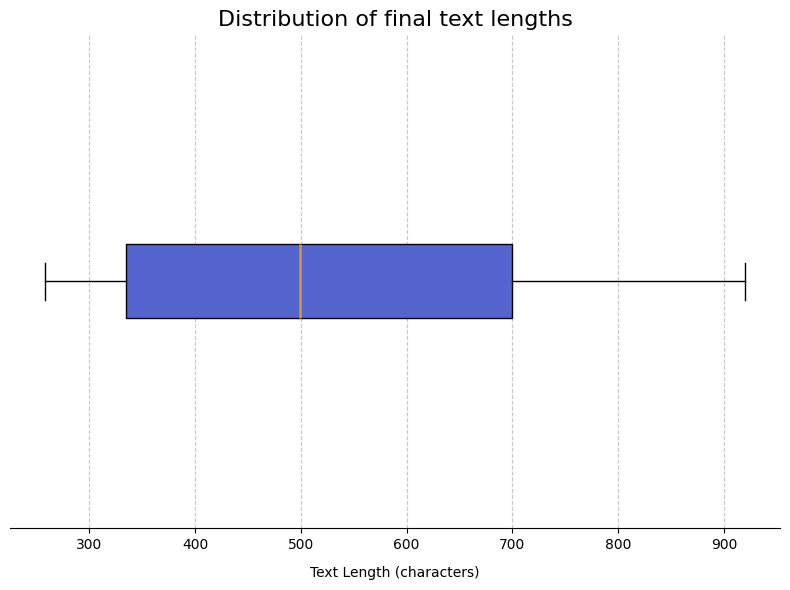

In [ ]:
# Iterate through each story in the data
final_text_lengths = []  # Store lengths of the last 'text' elements
for story_id, story_data in data.items():
    # Get the 'elements_order' dictionary
    elements_order = story_data.get('elements_order', {})
    elements = story_data.get('elements', [])

    # Get the last element's key and value
    last_element_value = elements_order[str(len(elements_order))]

    # Check if the last element is "text"
    if last_element_value == "text":
        texts = story_data.get('texts', [])
        last_text = texts[-1]
        final_text_lengths.append(len(last_text))
print(f'Number of stories with closing text: {len(final_text_lengths)}')

# Plot the final text lengths if needed
plt.figure(figsize=(8, 6))
plt.boxplot(final_text_lengths, vert=False, patch_artist=True, boxprops=dict(facecolor=color_palette[0]), medianprops=dict(color=color_palette[3], linewidth=2))
plt.title('Distribution of final text lengths', fontsize=16)
plt.xlabel("Text Length (characters)", labelpad=10)
plt.yticks([])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(axis='x', linestyle="--", alpha=0.7) 

plt.tight_layout()
# Save as JPG with 300 dpi
# plt.savefig("outputs/img/9.jpg", dpi=300, bbox_inches="tight", format="jpg")

# Save as EPS (vector format, resolution-independent)
# plt.savefig("outputs/img/9.eps", format="eps", bbox_inches="tight")
plt.show()


Number of stories with closing text: 12


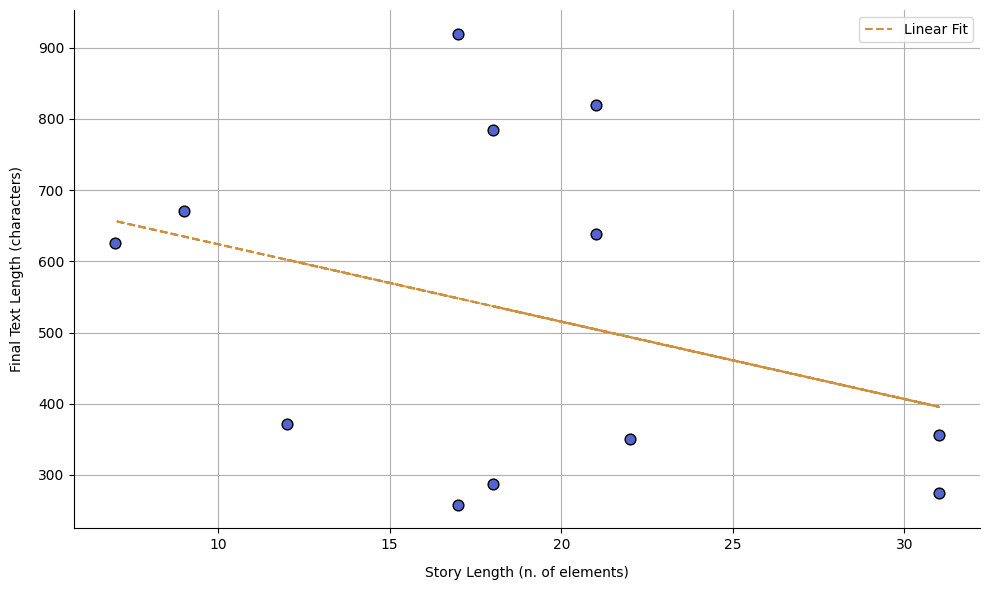

In [17]:
story_lengths = []
final_text_lengths = []

for story_id, story_data in data.items():
    elements_order = story_data.get('elements_order', {})
    last_element_value = elements_order[str(len(elements_order))]

    # Check if the last element is "text"
    if last_element_value == "text":
        texts = story_data.get('texts', [])
        last_text = texts[-1]
        final_text_lengths.append(len(last_text))
        story_lengths.append(len(elements_order))
print(f'Number of stories with closing text: {len(final_text_lengths)}')

coeffs = np.polyfit(story_lengths, final_text_lengths, 1)  # Linear regression
trendline = np.polyval(coeffs, story_lengths)

plt.figure(figsize=(10, 6))
plt.scatter(story_lengths, final_text_lengths, 
            color=color_palette[0], edgecolor='black', s=60)
plt.plot(story_lengths, trendline, color=color_palette[3], linestyle="--", label='Linear Fit')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Story Length (n. of elements)", labelpad=10)
plt.ylabel("Final Text Length (characters)", labelpad=10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()